# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import csv
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudesa
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities lista
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

575

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q=darhan"
print(query_url)
response = requests.get(query_url).json()
pprint(response)

http://api.openweathermap.org/data/2.5/weather?appid=9f10635e8958847e05222543a337872b&units=Imperial&q=darhan
{'base': 'model',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 49.49, 'lon': 105.92},
 'dt': 1580072851,
 'id': 2031964,
 'main': {'feels_like': -6.38,
          'grnd_level': 928,
          'humidity': 79,
          'pressure': 1028,
          'sea_level': 1028,
          'temp': 0.39,
          'temp_max': 0.39,
          'temp_min': 0.39},
 'name': 'Darhan',
 'sys': {'country': 'MN', 'sunrise': 1580085365, 'sunset': 1580118085},
 'timezone': 28800,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 270, 'speed': 0.51}}


In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=9f10635e8958847e05222543a337872b&units=Imperial&q=


In [6]:
citi_id=[]
for index, city in np.ndenumerate(cities):
    citi_id.append(index[0])
    print(index[0],": ", city)

0 :  chokurdakh
1 :  rikitea
2 :  port elizabeth
3 :  bluff
4 :  ciro marina
5 :  severo-kurilsk
6 :  ilhabela
7 :  coahuayana
8 :  busselton
9 :  hilo
10 :  vardo
11 :  samarai
12 :  hastings
13 :  dikson
14 :  sao joao da barra
15 :  port blair
16 :  nome
17 :  pitimbu
18 :  minna
19 :  east london
20 :  ilulissat
21 :  lehigh acres
22 :  bredasdorp
23 :  college
24 :  bijie
25 :  puerto concordia
26 :  vaini
27 :  portland
28 :  mar del plata
29 :  ust-maya
30 :  punta arenas
31 :  bambous virieux
32 :  hermanus
33 :  ushuaia
34 :  cape town
35 :  albany
36 :  pochutla
37 :  atar
38 :  barentsburg
39 :  mataura
40 :  bathsheba
41 :  verkhnyaya inta
42 :  poso
43 :  pedernales
44 :  san miguel
45 :  hobart
46 :  haines junction
47 :  chara
48 :  manavalakurichi
49 :  praia da vitoria
50 :  georgetown
51 :  port alfred
52 :  lebu
53 :  cayenne
54 :  atuona
55 :  villazon
56 :  yellowknife
57 :  merrill
58 :  indianola
59 :  sambava
60 :  victoria
61 :  kilindoni
62 :  belushya guba
63


city = []
cloudiness = []
country=[]
date=[]
humidity=[]
lat=[]
lng=[]
max_temp=[]
wind_speed=[]


for city_ in cities:
    response = requests.get(query_url + city_).json()
    try:
        city.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        print(f"{city_} FOUND <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
    except:
        print(f"{city_} NOT FOUND *********")
        pass

In [9]:
weather_df=pd.DataFrame({"City":city,
                         "Cloudiness":cloudiness,
                         "Country":country,
                         "Date":date,
                         "Humidity":humidity,
                         "Lat":lat,
                         "Lng":lng,
                         "Max Temp":max_temp,
                         "Wind Speed":wind_speed})
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Chokurdakh,100,RU,1580072879,97,70.63,147.92,-23.10,5.64
1,Rikitea,0,PF,1580072879,79,-23.12,-134.97,78.87,13.20
2,Port Elizabeth,4,ZA,1580072879,67,-33.92,25.57,62.60,17.22
3,Bluff,98,NZ,1580072879,87,-46.60,168.33,60.01,5.01
4,Ciro Marina,87,IT,1580072879,76,39.37,17.13,54.41,4.07
...,...,...,...,...,...,...,...,...,...
520,Thinadhoo,100,MV,1580072944,78,0.53,72.93,81.45,8.28
521,Benguela,100,AO,1580072944,77,-12.58,13.41,79.56,3.65
522,Wanning,100,CN,1580072944,87,18.80,110.40,60.35,6.96
523,Lerwick,100,GB,1580072944,75,60.15,-1.15,42.80,25.28


In [13]:
#weather_df['City ID']= weather_df.index
#weather_df 

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,City ID
0,Chokurdakh,100,RU,1580072879,97,70.63,147.92,-23.10,5.64,0
1,Rikitea,0,PF,1580072879,79,-23.12,-134.97,78.87,13.20,1
2,Port Elizabeth,4,ZA,1580072879,67,-33.92,25.57,62.60,17.22,2
3,Bluff,98,NZ,1580072879,87,-46.60,168.33,60.01,5.01,3
4,Ciro Marina,87,IT,1580072879,76,39.37,17.13,54.41,4.07,4
...,...,...,...,...,...,...,...,...,...,...
520,Thinadhoo,100,MV,1580072944,78,0.53,72.93,81.45,8.28,520
521,Benguela,100,AO,1580072944,77,-12.58,13.41,79.56,3.65,521
522,Wanning,100,CN,1580072944,87,18.80,110.40,60.35,6.96,522
523,Lerwick,100,GB,1580072944,75,60.15,-1.15,42.80,25.28,523


In [10]:
weather_df["City"].count()

525

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
# Save as a csv
weather_df.to_csv("cities_data.csv", encoding="utf-8", index=True,header=True,index_label="City ID")

In [5]:
weather_data = pd.read_csv("../starter_code/cities_data.csv")
weather_data.head()

,City ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,City ID.1
0,0,Chokurdakh,100,RU,1580072879,97,70.63,147.92,-23.10,5.64,0
1,1,Rikitea,0,PF,1580072879,79,-23.12,-134.97,78.87,13.20,1
2,2,Port Elizabeth,4,ZA,1580072879,67,-33.92,25.57,62.60,17.22,2
3,3,Bluff,98,NZ,1580072879,87,-46.60,168.33,60.01,5.01,3
4,4,Ciro Marina,87,IT,1580072879,76,39.37,17.13,54.41,4.07,4


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

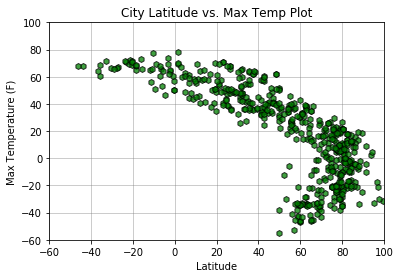

In [12]:
fig1,ax1=plt.subplots()
plt.scatter(weather_data['Max Temp'],weather_data['Lat'], marker="h", facecolors="green", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Max Temp Plot")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(-60,100)
plt.ylim(-60,100)
ax1.yaxis.grid(True, linestyle='-', which='major', color='grey',
               alpha=0.5)
ax1.xaxis.grid(True, linestyle='-', which='major', color='grey',
               alpha=0.5)
ax1.set_axisbelow(True)
plt.savefig("./Output/LatVsTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

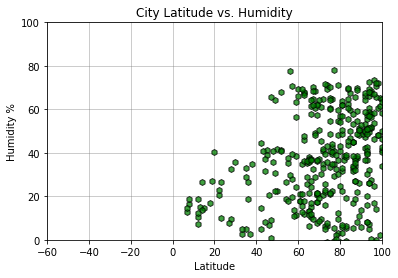

In [13]:
fig2,ax2=plt.subplots()
plt.scatter(weather_data['Humidity'],weather_data['Lat'], marker="h", facecolors="green", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.xlim(-60,100)
plt.ylim(0,100)
ax2.yaxis.grid(True, linestyle='-', which='major', color='grey',
               alpha=0.5)
ax2.xaxis.grid(True, linestyle='-', which='major', color='grey',
               alpha=0.5)
ax2.set_axisbelow(True)
plt.savefig("./Output/LatVsHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

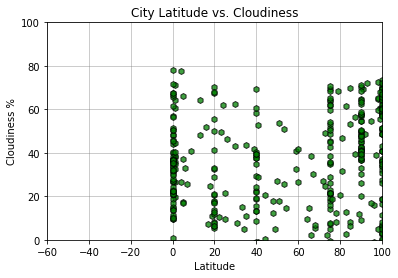

In [14]:
fig3,ax3=plt.subplots()
plt.scatter(weather_data['Cloudiness'],weather_data['Lat'], marker="h", facecolors="green", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.xlim(-60,100)
plt.ylim(0,100)
ax3.yaxis.grid(True, linestyle='-', which='major', color='grey',
               alpha=0.5)
ax3.xaxis.grid(True, linestyle='-', which='major', color='grey',
               alpha=0.5)
ax3.set_axisbelow(True)
plt.savefig("./Output/LatVsCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

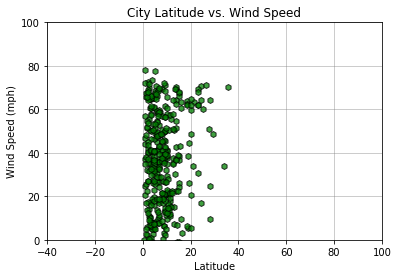

In [17]:
fig4,ax4=plt.subplots()
plt.scatter(weather_data['Wind Speed'],weather_data['Lat'], marker="h", facecolors="green", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(-40,100)
plt.ylim(0,100)
ax4.yaxis.grid(True, linestyle='-', which='major', color='grey',
               alpha=0.5)
ax4.xaxis.grid(True, linestyle='-', which='major', color='grey',
               alpha=0.5)
ax4.set_axisbelow(True)
plt.savefig("./Output/LatVsWindSpeed.png")
plt.show()

## Linear Regression

In [20]:
# OPTIONAL: Create a function to create Linear Regression plots


In [18]:
# Create Northern and Southern Hemisphere DataFrames
nhemisphere_df=weather_data.loc[weather_data['Lat']>0]
nhemisphere_df

,City ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,City ID.1
0,0,Chokurdakh,100,RU,1580072879,97,70.63,147.92,-23.10,5.64,0
4,4,Ciro Marina,87,IT,1580072879,76,39.37,17.13,54.41,4.07,4
5,5,Severo-Kuril'sk,100,RU,1580072722,92,50.68,156.12,19.06,13.20,5
7,7,Coahuayana Viejo,40,MX,1580072879,54,18.73,-103.68,78.80,8.30,7
9,9,Hilo,1,US,1580072880,57,19.73,-155.09,78.80,4.70,9
...,...,...,...,...,...,...,...,...,...,...,...
515,515,Ayan,0,RU,1580072943,59,56.45,138.17,-11.40,9.46,515
518,518,Voskresenskoye,100,RU,1580072944,94,56.84,45.43,20.16,6.51,518
520,520,Thinadhoo,100,MV,1580072944,78,0.53,72.93,81.45,8.28,520
522,522,Wanning,100,CN,1580072944,87,18.80,110.40,60.35,6.96,522


In [19]:
shemisphere_df=weather_data.loc[weather_data['Lat']<0]
shemisphere_df

,City ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,City ID.1
1,1,Rikitea,0,PF,1580072879,79,-23.12,-134.97,78.87,13.20,1
2,2,Port Elizabeth,4,ZA,1580072879,67,-33.92,25.57,62.60,17.22,2
3,3,Bluff,98,NZ,1580072879,87,-46.60,168.33,60.01,5.01,3
6,6,Ilhabela,0,BR,1580072879,72,-23.78,-45.36,78.13,10.89,6
8,8,Busselton,0,AU,1580072880,44,-33.65,115.33,66.00,11.36,8
...,...,...,...,...,...,...,...,...,...,...,...
516,516,Puerto Varas,0,CL,1580072943,52,-41.32,-72.99,68.00,11.41,516
517,517,Waitati,100,NZ,1580072943,83,-45.75,170.57,64.99,7.00,517
519,519,Coolum Beach,54,AU,1580072944,80,-26.53,153.10,80.01,2.55,519
521,521,Benguela,100,AO,1580072944,77,-12.58,13.41,79.56,3.65,521


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8729617326821784


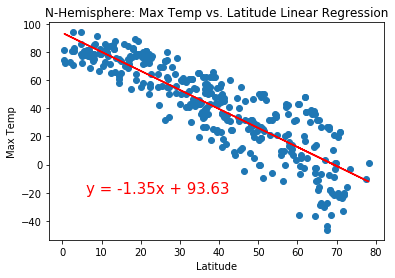

In [22]:
x= nhemisphere_df['Lat']
y= nhemisphere_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("N-Hemisphere: Max Temp vs. Latitude Linear Regression")
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,-20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5389268174150845


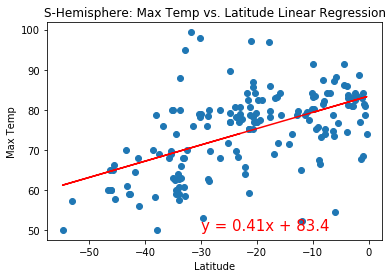

In [24]:
x= shemisphere_df['Lat']
y= shemisphere_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("S-Hemisphere: Max Temp vs. Latitude Linear Regression")
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.36462972558602186


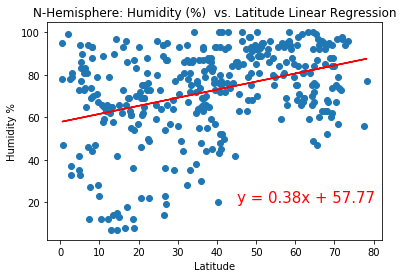

In [28]:
x= nhemisphere_df['Lat']
y= nhemisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("N-Hemisphere: Humidity (%)  vs. Latitude Linear Regression")
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.18750890126873684


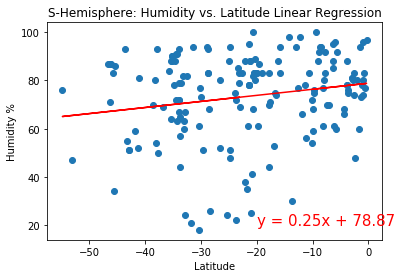

In [24]:
x= shemisphere_df['Lat']
y= shemisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("S-Hemisphere: Humidity vs. Latitude Linear Regression")
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-20,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.20727550438552586


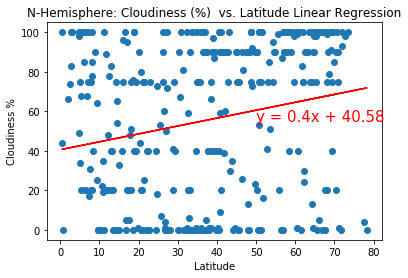

In [31]:
x= nhemisphere_df['Lat']
y= nhemisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("N-Hemisphere: Cloudiness (%)  vs. Latitude Linear Regression")
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(50,55),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.15685317769516172


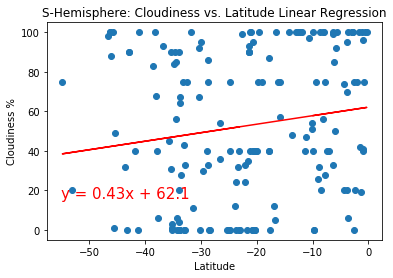

In [34]:
x= shemisphere_df['Lat']
y= shemisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("S-Hemisphere: Cloudiness vs. Latitude Linear Regression")
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-55,16),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.09615789921602684


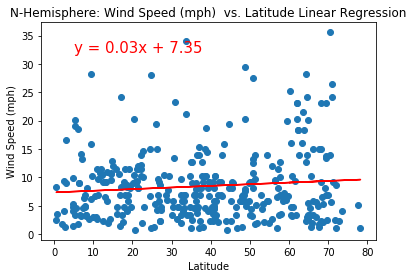

In [36]:
x= nhemisphere_df['Lat']
y= nhemisphere_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("N-Hemisphere: Wind Speed (mph)  vs. Latitude Linear Regression")
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(5,32),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.247479222546005


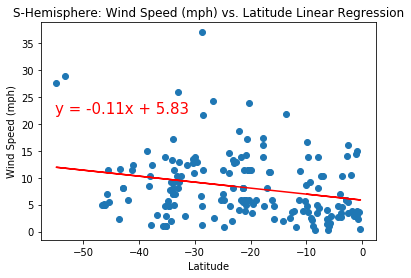

In [38]:
x= shemisphere_df['Lat']
y= shemisphere_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("S-Hemisphere: Wind Speed (mph) vs. Latitude Linear Regression")
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-55,22),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()